<a href="https://colab.research.google.com/github/Shivdutta/AdvanceCNN/blob/master/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

!unzip -q "/content/gdrive/My Drive/CNN_Images/ImagesPred.zip"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
%ls /content/ImagesPred/Images/

Test/  Train/


In [0]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras import optimizers 
from keras.callbacks import TensorBoard,ModelCheckpoint
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from time import time
import math

In [0]:
#Give dataset path
trainpath = "/content/ImagesPred/Images/Train"
testpath = "/content/ImagesPred/Images/Test"

In [0]:
batch_size=16
Image_Size =32
  
train_datagen = image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
 
test_datagen = image.ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
        trainpath,
        target_size=(Image_Size, Image_Size),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        testpath,
        target_size=(Image_Size,Image_Size),
        batch_size=batch_size,
        class_mode='categorical')

Found 32 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


In [0]:
from keras import applications

# This will load the whole VGG16 network, including the top Dense layers.
# Note: by specifying the shape of top layers, input tensor shape is forced
# to be (224, 224, 3), therefore you can use it only on 224x224 images.
#vgg_model = applications.VGG16(weights='imagenet', include_top=True)

# If you are only interested in convolution filters. Note that by not
# specifying the shape of top layers, the input tensor shape is (None, None, 3),
# so you can use them for any size of images.
#vgg_model = applications.VGG16(weights='imagenet', include_top=False)

# If you want to specify input tensor
from keras.layers import Input
input_tensor = Input(shape=(Image_Size, Image_Size, 3))
vgg_model = applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_tensor=input_tensor)

# To see the models' architecture and layer names, run the following
#vgg_model.summary()

58892288/58889256 [==============================] - 3s 0us/step


In [0]:
# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

layer_dict

{'block1_conv1': <keras.layers.convolutional.Conv2D at 0x7f046e8f25f8>,
 'block1_conv2': <keras.layers.convolutional.Conv2D at 0x7f042c16ce80>,
 'block1_pool': <keras.layers.pooling.MaxPooling2D at 0x7f042c16cba8>,
 'block2_conv1': <keras.layers.convolutional.Conv2D at 0x7f042c16c780>,
 'block2_conv2': <keras.layers.convolutional.Conv2D at 0x7f04204c7ba8>,
 'block2_pool': <keras.layers.pooling.MaxPooling2D at 0x7f04204d2748>,
 'block3_conv1': <keras.layers.convolutional.Conv2D at 0x7f04204d2588>,
 'block3_conv2': <keras.layers.convolutional.Conv2D at 0x7f04204dc9b0>,
 'block3_conv3': <keras.layers.convolutional.Conv2D at 0x7f04204dce10>,
 'block3_pool': <keras.layers.pooling.MaxPooling2D at 0x7f04204e4898>,
 'block4_conv1': <keras.layers.convolutional.Conv2D at 0x7f04204e46d8>,
 'block4_conv2': <keras.layers.convolutional.Conv2D at 0x7f04204ea3c8>,
 'block4_conv3': <keras.layers.convolutional.Conv2D at 0x7f04204eada0>,
 'block4_pool': <keras.layers.pooling.MaxPooling2D at 0x7f04204ef9e

In [0]:
# Getting output tensor of the last VGG layer that we want to include . It is not block5_pool
x = layer_dict['block2_pool'].output
x

<tf.Tensor 'block2_pool/MaxPool:0' shape=(None, 8, 8, 128) dtype=float32>

In [0]:
len(layer_dict)

19

In [0]:
# We are considering upto 7th layer which is x variable
# Stacking a new simple convolutional network on top of it    
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
# x = GlobalAveragePooling2D()(x) #change ndim from 2 to 4
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)
x

<tf.Tensor 'dense_2/Softmax:0' shape=(None, 4) dtype=float32>

In [0]:
x.shape,x

(TensorShape([None, 4]),
 <tf.Tensor 'dense_2/Softmax:0' shape=(None, 4) dtype=float32>)

In [0]:
def sch(epoch):
  return round(0.004 * 1/(1 + 0.319 * epoch), 10)  


decay_rate = []
drop = 0.5
epochs_drop = 1.0
initial_lrate = 0.1

def step_decay(epoch):    
    # LearningRate = InitialLearningRate * DropRate^floor(Epoch / EpochDrop)
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    
    # Store the decaying learning rate in a list
    decay_rate.append(lrate)
    
    return lrate

def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * math.exp(0.1 * (10 - epoch))

In [0]:
# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
custom_model = Model(input=vgg_model.input, output=x)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:6]:
    layer.trainable = False

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
layer.output.shape
#custom_model.summary()

filepath = '/content/gdrive/My Drive/saved models/vgg16_model.h5'
checkpoint = ModelCheckpoint  (filepath, monitor='val_loss', verbose=1,save_best_only=True,save_weights_only=False, mode='auto',period=1)

#Initialize Learning Rate Scheduler Callback
#lr = LearningRateScheduler(sch)
#lr = LearningRateScheduler(step_decay)
lr = LearningRateScheduler(scheduler)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks_list = [checkpoint,lr]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
opt = optimizers.Adam()
custom_model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [0]:
history = custom_model.fit_generator(train_generator,
                         steps_per_epoch = len(train_generator),
                         epochs = 200,
                         validation_data = validation_generator,callbacks=callbacks_list) 
#validation_steps=len(validation_generator)

Epoch 1/200
2/2 [==============================] - 11s 5s/step - loss: 19.2560 - accuracy: 0.2812 - val_loss: 15.4792 - val_accuracy: 0.2500

Epoch 00001: val_loss improved from inf to 15.47919, saving model to /content/gdrive/My Drive/saved models/vgg16_model.h5
Epoch 2/200
2/2 [==============================] - 7s 4s/step - loss: 17.1216 - accuracy: 0.2500 - val_loss: 4.2528 - val_accuracy: 0.3750

Epoch 00002: val_loss improved from 15.47919 to 4.25282, saving model to /content/gdrive/My Drive/saved models/vgg16_model.h5
Epoch 3/200
2/2 [==============================] - 7s 4s/step - loss: 9.3315 - accuracy: 0.5312 - val_loss: 5.2064 - val_accuracy: 0.3750

Epoch 00003: val_loss did not improve from 4.25282
Epoch 4/200
2/2 [==============================] - 7s 4s/step - loss: 9.3850 - accuracy: 0.3125 - val_loss: 2.9578 - val_accuracy: 0.2500

Epoch 00004: val_loss improved from 4.25282 to 2.95783, saving model to /content/gdrive/My Drive/saved models/vgg16_model.h5
Epoch 5/200
2/2 

Text(0.5, 1.0, 'Loss vs Epochs')

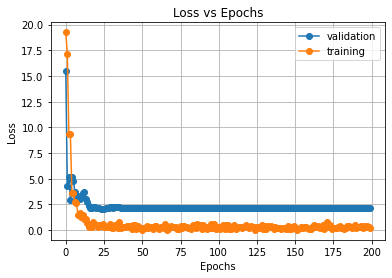

In [0]:
plt.plot(history.epoch,history.history['val_loss'],'-o',label='validation')
plt.plot(history.epoch,history.history['loss'],'-o',label='training')

plt.grid(True)
plt.legend(loc=0)

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss vs Epochs')

Text(0.5, 1.0, 'Learning Rate vs Epochs')

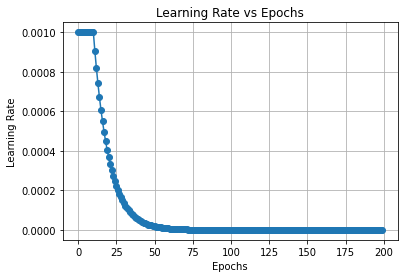

In [0]:
plt.plot(history.epoch, history.history['lr'],'-o')

plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate vs Epochs')

Text(0.5, 1.0, 'Accuracy vs Epochs')

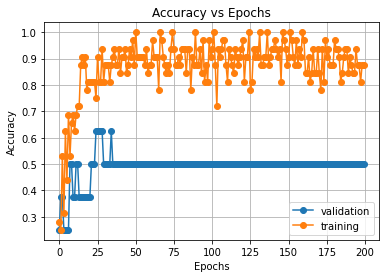

In [0]:

plt.plot(history.epoch,history.history['val_accuracy'], '-o', label='validation')
plt.plot(history.epoch,history.history['accuracy'], '-o', label='training')

plt.grid(True)
plt.legend(loc=0)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

In [0]:
for i in history.history:
    print(i)

val_loss
val_accuracy
loss
accuracy
lr


In [0]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/ImagesPred/Images/Test/Dipika/IMG20180110082005.jpg', target_size = (Image_Size, Image_Size))
#test_image = image.load_img('/content/ImagesPred/Images/Test/Shiv/IMG20200102162934.jpg', target_size = (Image_Size, Image_Size))
#test_image = image.load_img('/content/ImagesPred/Images/Test/Siddhant/IMG20191015153026.jpg', target_size = (Image_Size, Image_Size))
#test_image = image.load_img('/content/ImagesPred/Images/Test/Turtle/IMG20200418194924_01.jpg', target_size = (Image_Size, Image_Size))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
train_generator.class_indices
result = custom_model.predict(test_image)
train_generator.class_indices
train_generator.class_indices,result[0][0],result[0][1],result[0][2],result[0][3]



({'Dipika': 0, 'Shiv': 1, 'Siddhant': 2, 'Turtle': 3}, 1.0, 0.0, 0.0, 0.0)

In [0]:
if result[0][0] == 1:
    prediction = 'Dipika'
    print(prediction)
elif result[0][1] == 1:
    prediction = 'Shiv'
    print(prediction)
elif result[0][2] == 1:
    prediction = 'Siddhant'
    print(prediction)
elif result[0][3] == 1:
    prediction = 'Turtle'
    print(prediction)
else:
    prediction = 'Not able to predict'
    print(prediction)


Dipika


In [0]:
#Below result is run of 50 epoch
results = custom_model.evaluate_generator(train_generator, verbose=1)
dict(zip(custom_model.metrics_names, results))

2/2 [==============================] - 6s 3s/step


{'accuracy': 1.0, 'loss': 0.021319391205906868}

In [0]:
#Below result is run of 50 epoch
results = custom_model.evaluate_generator(validation_generator, verbose=1)
dict(zip(custom_model.metrics_names, results))

1/1 [==============================] - 2s 2s/step


{'accuracy': 0.5, 'loss': 2.1563875675201416}